# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information and json
def weather_check(city):
    url = "http://api.openweathermap.org/data/2.5/weather?q=" + city + "&appid=" + weather_api_key + "&units=imperial"
    results = requests.get(url)
    weather_json = results.json()
    try:
        id = weather_json['id']
        temp = weather_json['main']['temp']
        lat = weather_json['coord']['lat']
        lon = weather_json['coord']['lon']
        max_temp = weather_json['main']['temp_max']
        humidity = weather_json['main']['humidity']
        clouds = weather_json['clouds']['all']
        wind = weather_json['wind']['speed']
        country = weather_json['sys']['country']
        date = weather_json['dt']
        print(f"Processing {city} with city number {id}")
        return id, temp
    except:
        pass

for city in cities:
    try:
        wc = weather_check(city)
        
        id = wc[0]
        temp = wc[1]
        #print(wc)
    except:
        print(f"City, {city}, not found. Skipping...")

Processing svobodnyy with city number 2015833
Processing primorsk with city number 696292
Processing ushuaia with city number 3833367
City, kachikau, not found. Skipping...
Processing bengkulu with city number 1649150
Processing champerico with city number 3598787
Processing hobart with city number 2163355
Processing new norfolk with city number 2155415
Processing akdepe with city number 601551
Processing vostok with city number 2013279
Processing soto la marina with city number 3516522
Processing puerto ayora with city number 3652764
Processing mataura with city number 6201424
Processing chokurdakh with city number 2126123
Processing dikson with city number 1507390
Processing georgetown with city number 1735106
Processing ostrovnoy with city number 556268
City, amderma, not found. Skipping...
Processing saint george with city number 5546220
Processing port alfred with city number 964432
Processing punta arenas with city number 3874787
Processing tuktoyaktuk with city number 6170031
Pr

Processing ambovombe with city number 1079048
Processing los llanos de aridane with city number 2514651
City, urdzhar, not found. Skipping...
Processing talnakh with city number 1490256
Processing san cristobal with city number 3628473
Processing mafeteng with city number 932614
Processing asau with city number 686090
Processing tasiilaq with city number 3424607
Processing martapura with city number 1636022
Processing general pico with city number 3855075
Processing khash with city number 1160571
Processing san quintin with city number 3984997
Processing high level with city number 5975004
Processing sola with city number 2134814
Processing atar with city number 2381334
Processing turayf with city number 101312
Processing moose factory with city number 6078372
Processing mar del plata with city number 3430863
Processing yenagoa with city number 2318123
Processing hovd with city number 1516048
Processing aksarka with city number 1512019
Processing mahebourg with city number 934322
Proce

Processing cauas with city number 682522
Processing mount isa with city number 2065594
Processing edmundston with city number 6545023
City, ijaki, not found. Skipping...
Processing hay river with city number 5972762
Processing mangrol with city number 1263752
Processing clyde river with city number 5924351
Processing asosa with city number 343292
Processing severobaykalsk with city number 2016910
Processing mubi with city number 2329821
Processing xingyi with city number 1787599
Processing caravelas with city number 3466980
Processing sri aman with city number 1735799
Processing ngunguru with city number 2186111
Processing dunedin with city number 2191562
Processing vagay with city number 1487860
Processing tupik with city number 2014836
Processing ouro preto with city number 3455671
Processing kahului with city number 5847411
Processing inirida with city number 3671450
Processing freeport with city number 5117949
City, kuche, not found. Skipping...
Processing betul with city number 12

Processing el alto with city number 3697441
Processing shache with city number 1280037
Processing russellville with city number 4129397
Processing nuevo progreso with city number 3522526
Processing atambua with city number 1651103
Processing pokhara with city number 1282898
Processing rawson with city number 3839307
Processing hasaki with city number 2112802
Processing brazzaville with city number 2260535
Processing constantine with city number 2501152
Processing balkhash with city number 1525798
Processing barra do garcas with city number 3470709
Processing lubango with city number 3347762
Processing oussouye with city number 2246901
Processing yashkul with city number 468747
Processing udachnyy with city number 2014624
Processing taoudenni with city number 2450173
Processing necochea with city number 3430443
Processing praia da vitoria with city number 3372760
Processing rundu with city number 3353383
Processing male with city number 1282027
Processing lata with city number 2738381
P

In [4]:
# Lists to hold data
city_list = []
lat = []
lon = []
max_temp = []
humidity = []
clouds = []
wind = []
country = []
date = []

#Loop through weather data
def weather_check(city):
    url = "http://api.openweathermap.org/data/2.5/weather?q=" + city + "&appid=" + weather_api_key + "&units=imperial"
    results = requests.get(url)
    weather_json = results.json()
    try:
        #print(f"wc city is: {city}")
        #print(f"lat is: {lat}")
        #city_list.append({city})
        city_list.append(weather_json['name'])
        lat.append(weather_json['coord']['lat'])
        lon.append(weather_json['coord']['lon'])
        max_temp.append(weather_json['main']['temp_max'])
        humidity.append(weather_json['main']['humidity'])
        clouds.append(weather_json['clouds']['all'])
        wind.append(weather_json['wind']['speed'])
        country.append(weather_json['sys']['country'])
        date.append(weather_json['dt'])
        #print(f"Processing {city} with city number {id}")
        return lon
    except:
        pass
#cities = 'Paris','Minneapolis','Chicago'
for city in cities:
    try:
        wc = weather_check(city)
        #lat = wc[0]
        #print(wc)
    except:
        pass

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# create a data frame
weather_dict = {
    'City': city_list,
    'Lat': lat,
    'Lon': lon,
    'Max_Temp': max_temp,
    'Humidity': humidity,
    'Cloudiness': clouds,
    'Wind_Speed': wind, 
    'Country': country,
    'Date': date
    
}
city_weather_data_df = pd.DataFrame(weather_dict)
city_weather_data_df


,City,Lat,Lon,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,Svobodnyy,51.40,128.13,66.02,64,27,10.00,RU,1595332944
1,Prymors'k,46.73,36.34,79.77,54,68,3.18,UA,1595332944
2,Ushuaia,-54.80,-68.30,26.60,92,0,3.65,AR,1595332944
3,Bengkulu,-3.80,102.27,80.69,82,100,6.15,ID,1595332945
4,Champerico,14.30,-91.92,77.43,84,99,10.47,GT,1595332945
...,...,...,...,...,...,...,...,...,...
549,Warsaw,52.23,21.01,77.00,49,27,12.75,PL,1595332908
550,Ruska Poliana,49.42,31.92,80.35,49,49,11.03,UA,1595333040
551,Skibotn,69.39,20.27,55.40,87,75,5.82,NO,1595333040
552,Balatan,13.32,123.23,81.21,85,100,5.95,PH,1595333040


In [6]:
#Output to CSV
city_weather_data_df.to_csv('C:/Users/kwelter/Desktop/Repositories/python_APIs/output_data/city_data.csv')
    

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
city_weather_data_df

,City,Lat,Lon,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,Svobodnyy,51.40,128.13,66.02,64,27,10.00,RU,1595332944
1,Prymors'k,46.73,36.34,79.77,54,68,3.18,UA,1595332944
2,Ushuaia,-54.80,-68.30,26.60,92,0,3.65,AR,1595332944
3,Bengkulu,-3.80,102.27,80.69,82,100,6.15,ID,1595332945
4,Champerico,14.30,-91.92,77.43,84,99,10.47,GT,1595332945
...,...,...,...,...,...,...,...,...,...
549,Warsaw,52.23,21.01,77.00,49,27,12.75,PL,1595332908
550,Ruska Poliana,49.42,31.92,80.35,49,49,11.03,UA,1595333040
551,Skibotn,69.39,20.27,55.40,87,75,5.82,NO,1595333040
552,Balatan,13.32,123.23,81.21,85,100,5.95,PH,1595333040


In [8]:
#  Get the indices of cities that have humidity over 100%.
find_humidity_outliers = city_weather_data_df[city_weather_data_df['Humidity'] > 100 ].index
#find_humidity_outliers

In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
cleaned_city_data_df = city_weather_data_df.drop(find_humidity_outliers , inplace=False)
cleaned_city_data_df

,City,Lat,Lon,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,Svobodnyy,51.40,128.13,66.02,64,27,10.00,RU,1595332944
1,Prymors'k,46.73,36.34,79.77,54,68,3.18,UA,1595332944
2,Ushuaia,-54.80,-68.30,26.60,92,0,3.65,AR,1595332944
3,Bengkulu,-3.80,102.27,80.69,82,100,6.15,ID,1595332945
4,Champerico,14.30,-91.92,77.43,84,99,10.47,GT,1595332945
...,...,...,...,...,...,...,...,...,...
549,Warsaw,52.23,21.01,77.00,49,27,12.75,PL,1595332908
550,Ruska Poliana,49.42,31.92,80.35,49,49,11.03,UA,1595333040
551,Skibotn,69.39,20.27,55.40,87,75,5.82,NO,1595333040
552,Balatan,13.32,123.23,81.21,85,100,5.95,PH,1595333040


In [10]:
# Extract relevant fields from the data frame
cols = [0,1,3,4,5,6]
relevant_city_data_df = cleaned_city_data_df[cleaned_city_data_df.columns[cols]]
relevant_city_data_df 

# Export the City_Data into a csv
relevantcity_output_data_file = "output_data/cities.csv"

relevant_city_data_df 

,City,Lat,Max_Temp,Humidity,Cloudiness,Wind_Speed
0,Svobodnyy,51.40,66.02,64,27,10.00
1,Prymors'k,46.73,79.77,54,68,3.18
2,Ushuaia,-54.80,26.60,92,0,3.65
3,Bengkulu,-3.80,80.69,82,100,6.15
4,Champerico,14.30,77.43,84,99,10.47
...,...,...,...,...,...,...
549,Warsaw,52.23,77.00,49,27,12.75
550,Ruska Poliana,49.42,80.35,49,49,11.03
551,Skibotn,69.39,55.40,87,75,5.82
552,Balatan,13.32,81.21,85,100,5.95


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

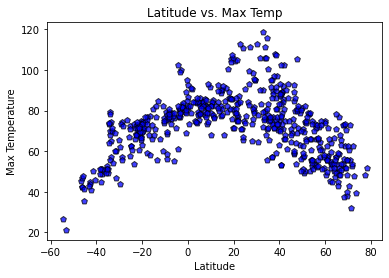

In [11]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen. 
# Note: this means mouse weight goes on the x-axis, with average tumor volume on the y-axis. 
x_axis = relevant_city_data_df ["Lat"]
y_axis = relevant_city_data_df ["Max_Temp"]

plt.scatter(x_axis, y_axis, marker="p", facecolors="blue", edgecolors="black",alpha=0.75)
plt.title("Latitude vs. Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.show()

## Latitude vs. Humidity Plot

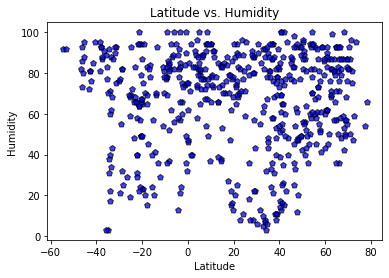

In [12]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen. 
# Note: this means mouse weight goes on the x-axis, with average tumor volume on the y-axis. 
x_axis = relevant_city_data_df ["Lat"]
y_axis = relevant_city_data_df ["Humidity"]

plt.scatter(x_axis, y_axis, marker="p", facecolors="blue", edgecolors="black", alpha=0.75)
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

## Latitude vs. Cloudiness Plot

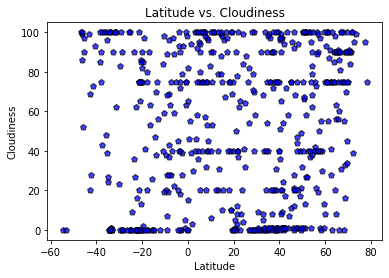

In [13]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen. 
# Note: this means mouse weight goes on the x-axis, with average tumor volume on the y-axis. 
x_axis = relevant_city_data_df ["Lat"]
y_axis = relevant_city_data_df ["Cloudiness"]

plt.scatter(x_axis, y_axis, marker="p", facecolors="blue", edgecolors="black", alpha=0.75)
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

## Latitude vs. Wind Speed Plot

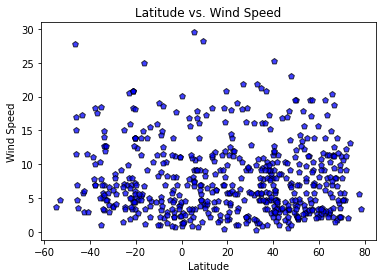

In [14]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen. 
# Note: this means mouse weight goes on the x-axis, with average tumor volume on the y-axis. 
x_axis = relevant_city_data_df ["Lat"]
y_axis = relevant_city_data_df ["Wind_Speed"]

plt.scatter(x_axis, y_axis, marker="p", facecolors="blue", edgecolors="black", alpha=0.75)
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

## Linear Regression

In [15]:
# OPTIONAL: Create a function to create Linear Regression plots
hemisphere = []
x_values = []
def linear regression: 
    x_axis = hemisphere = []
    y_axis = x_values = []

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    regress_values = x_axis * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x_axis, y_axis, marker="p", facecolors="blue", edgecolors="black",
            s=x_axis, alpha=0.75)
    plt.plot(x_axis,regress_values,"r-")
    plt.annotate(line_eq,(10,43),fontsize=18,color="red")

    plt.scatter(x_axis, y_axis, marker="p", facecolors="blue", edgecolors="black",alpha=0.75)


SyntaxError: invalid syntax (<ipython-input-15-f941a76cc5e6>, line 4)

In [16]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere_df = relevant_city_data_df.loc[relevant_city_data_df['Lat'] >= 0] 
southern_hemisphere_df = relevant_city_data_df.loc[relevant_city_data_df['Lat'] <= 0] 
northern_hemisphere_df

,City,Lat,Max_Temp,Humidity,Cloudiness,Wind_Speed
0,Svobodnyy,51.40,66.02,64,27,10.00
1,Prymors'k,46.73,79.77,54,68,3.18
4,Champerico,14.30,77.43,84,99,10.47
7,Akdepe,42.06,102.20,15,0,11.41
8,Vostok,46.49,58.71,98,100,1.54
...,...,...,...,...,...,...
549,Warsaw,52.23,77.00,49,27,12.75
550,Ruska Poliana,49.42,80.35,49,49,11.03
551,Skibotn,69.39,55.40,87,75,5.82
552,Balatan,13.32,81.21,85,100,5.95


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

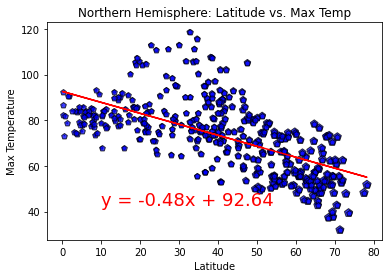

In [17]:
x_axis = northern_hemisphere_df["Lat"]
y_axis = northern_hemisphere_df ["Max_Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis, y_axis, marker="p", facecolors="blue", edgecolors="black",
            s=x_axis, alpha=0.75)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(10,43),fontsize=18,color="red")

plt.scatter(x_axis, y_axis, marker="p", facecolors="blue", edgecolors="black",alpha=0.75)
plt.title("Northern Hemisphere: Latitude vs. Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

C:\Users\kwelter\Anaconda3\envs\NewPythonData\lib\site-packages\matplotlib\collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
C:\Users\kwelter\Anaconda3\envs\NewPythonData\lib\site-packages\matplotlib\collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


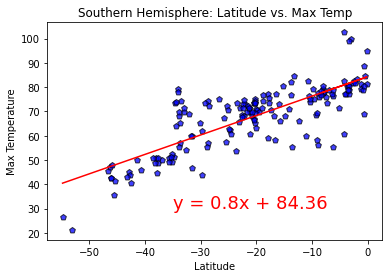

In [18]:
x_axis = southern_hemisphere_df["Lat"]
y_axis = southern_hemisphere_df ["Max_Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis, y_axis, marker="p", facecolors="blue", edgecolors="black",
            s=x_axis, alpha=0.75)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-35,30),fontsize=18,color="red")

plt.scatter(x_axis, y_axis, marker="p", facecolors="blue", edgecolors="black",alpha=0.75)
plt.title("Southern Hemisphere: Latitude vs. Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

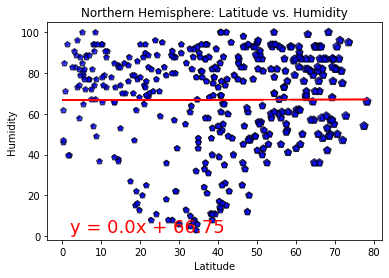

In [19]:
x_axis = northern_hemisphere_df["Lat"]
y_axis = northern_hemisphere_df ["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis, y_axis, marker="p", facecolors="blue", edgecolors="black",
            s=x_axis, alpha=0.75)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(2,2),fontsize=18,color="red")

plt.scatter(x_axis, y_axis, marker="p", facecolors="blue", edgecolors="black",alpha=0.75)
plt.title("Northern Hemisphere: Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

C:\Users\kwelter\Anaconda3\envs\NewPythonData\lib\site-packages\matplotlib\collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
C:\Users\kwelter\Anaconda3\envs\NewPythonData\lib\site-packages\matplotlib\collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


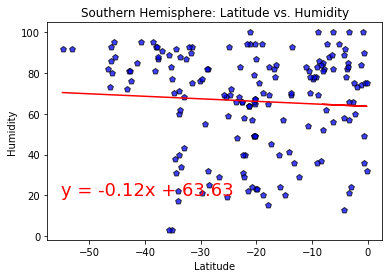

In [20]:
x_axis = southern_hemisphere_df["Lat"]
y_axis = southern_hemisphere_df ["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis, y_axis, marker="p", facecolors="blue", edgecolors="black",
            s=x_axis, alpha=0.75)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-55,20),fontsize=18,color="red")

plt.scatter(x_axis, y_axis, marker="p", facecolors="blue", edgecolors="black",alpha=0.75)
plt.title("Southern Hemisphere: Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

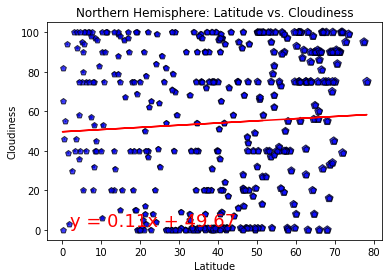

In [21]:
x_axis = northern_hemisphere_df["Lat"]
y_axis = northern_hemisphere_df ["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis, y_axis, marker="p", facecolors="blue", edgecolors="black",
            s=x_axis, alpha=0.75)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(2,2),fontsize=18,color="red")

plt.scatter(x_axis, y_axis, marker="p", facecolors="blue", edgecolors="black",alpha=0.75)
plt.title("Northern Hemisphere: Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

C:\Users\kwelter\Anaconda3\envs\NewPythonData\lib\site-packages\matplotlib\collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
C:\Users\kwelter\Anaconda3\envs\NewPythonData\lib\site-packages\matplotlib\collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


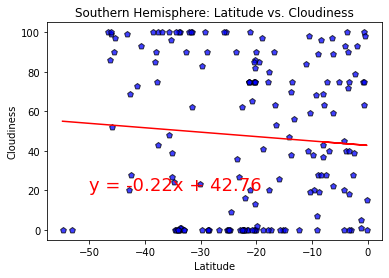

In [22]:
x_axis = southern_hemisphere_df["Lat"]
y_axis = southern_hemisphere_df ["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis, y_axis, marker="p", facecolors="blue", edgecolors="black",
            s=x_axis, alpha=0.75)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=18,color="red")

plt.scatter(x_axis, y_axis, marker="p", facecolors="blue", edgecolors="black",alpha=0.75)
plt.title("Southern Hemisphere: Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

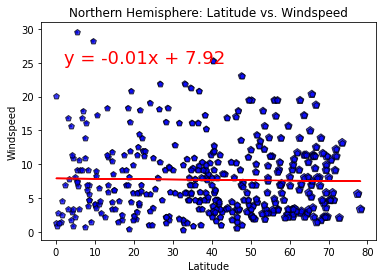

In [23]:
x_axis = northern_hemisphere_df["Lat"]
y_axis = northern_hemisphere_df ["Wind_Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis, y_axis, marker="p", facecolors="blue", edgecolors="black",
            s=x_axis, alpha=0.75)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(2,25),fontsize=18,color="red")

plt.scatter(x_axis, y_axis, marker="p", facecolors="blue", edgecolors="black",alpha=0.75)
plt.title("Northern Hemisphere: Latitude vs. Windspeed")
plt.xlabel("Latitude")
plt.ylabel("Windspeed")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

C:\Users\kwelter\Anaconda3\envs\NewPythonData\lib\site-packages\matplotlib\collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
C:\Users\kwelter\Anaconda3\envs\NewPythonData\lib\site-packages\matplotlib\collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


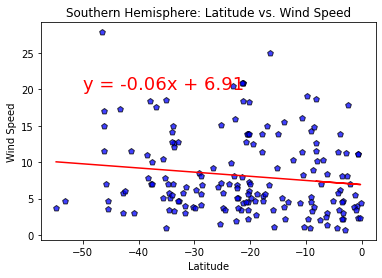

In [24]:
x_axis = southern_hemisphere_df["Lat"]
y_axis = southern_hemisphere_df ["Wind_Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis, y_axis, marker="p", facecolors="blue", edgecolors="black",
            s=x_axis, alpha=0.75)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=18,color="red")

plt.scatter(x_axis, y_axis, marker="p", facecolors="blue", edgecolors="black",alpha=0.75)
plt.title("Southern Hemisphere: Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()